# Feature importance using Random Forests

In [1]:
# Manejo de archivos
import os
from pathlib import Path

# Manejo de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

## Load data

In [6]:
print(f"Current path: {os.getcwd()}")

# Definir la ruta de los datos
data_path: Path = Path(r"../data/raw")
if not data_path.exists():
    print(f"Path {data_path} does not exits.")

# Imprimir archivos en la carpeta de datos
print(list(data_path.glob("*")))

Current path: /home/Cookiecutter-MLOps/notebooks
[PosixPath('../data/raw/datos_molienda (copy).parquet'), PosixPath('../data/raw/datos_molienda.parquet'), PosixPath('../data/raw/df_model.parquet')]


In [7]:
df = pd.read_parquet(data_path / "df_model.parquet")

In [8]:
df.shape

(221771, 28)

In [9]:
df.head()

,velocidad,potencia,per_solidos,celda_carga,rendimiento,flujo_agua,ruido,p80,in14,in12,...,in1,f80,dureza,wi,spi,imp_criticos,imp_estandares,jb,presion_avg,presion_ewm
date,,,,,,,,,,,,,,,,,,,,,
2022-11-15 00:00:00,75.761031,38829.984689,73.39844,78.362584,65.777186,73.931659,15.788181,64.260113,99.98547,99.93459,...,29.857760,39.063374,66.040209,94.815049,54.50695,5.75307,64.40281,0.045367,91.875140,88.832868
2022-11-15 00:00:10,75.761031,38801.377137,72.96875,78.673050,65.561138,74.949818,15.428343,64.260113,99.99471,99.97040,...,30.130893,39.063374,66.040209,94.815049,54.50695,5.75307,64.40281,0.043414,92.364275,89.271139
2022-11-15 00:00:20,75.761031,38168.832363,72.57031,78.973500,64.127962,75.815971,15.428343,64.260113,99.99471,99.97040,...,30.130893,39.063374,66.040209,94.815049,54.50695,5.75307,64.40281,0.041364,93.021432,89.849212
2022-11-15 00:00:30,75.761031,39007.987239,72.55859,78.973500,63.999458,75.815971,14.517244,64.260113,99.99471,99.97040,...,30.130893,35.656382,66.040209,94.815049,54.50695,5.75307,64.40281,0.039330,92.073034,89.613041
2022-11-15 00:00:40,75.684350,38731.447564,72.55859,79.223876,66.060989,75.815971,14.517244,64.260113,99.99544,99.97289,...,28.725894,35.479188,66.040209,94.815049,54.50695,5.75307,64.40281,0.037073,92.166380,89.520688


In [13]:
from sklearn.model_selection import train_test_split

X = df.drop('presion_ewm', axis=1)
y = df['presion_ewm']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

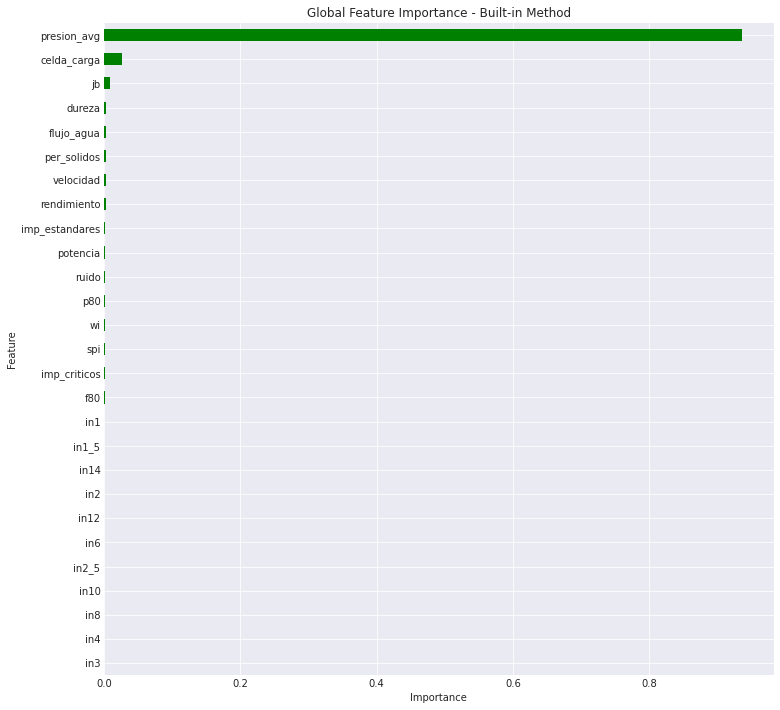

In [24]:
plt.figure(figsize=(12,12))
global_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

In [18]:
import numpy as np

X_train_random = X_train.copy()
X_train_random["RANDOM"] = np.random.RandomState(42).randn(X_train.shape[0])

rf_random = RandomForestRegressor(n_estimators=100, random_state=42)
rf_random.fit(X_train_random, y_train)

RandomForestRegressor(random_state=42)

In [30]:
%matplotlib inline
plt.figure(figsize=(12,12))
global_importances_random = pd.Series(rf_random.feature_importances_, index=X_train_random.columns)
global_importances_random.sort_values(ascending=True, inplace=True)
plt.show()

<Figure size 864x864 with 0 Axes>